<a href="https://colab.research.google.com/github/srinidhi183/SMART-SONAR-/blob/main/Exercise7_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import shap
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv("epi_r.csv")  # Replace with your dataset path
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PREPROCESSING

In [ ]:
# Check missing values
missing = data.isnull().sum()
print(missing[missing > 0])

# Impute missing values only for numeric columns
numeric_data = data.select_dtypes(include=np.number) # Select only numeric columns
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median(), inplace=False) # Impute and assign back

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64


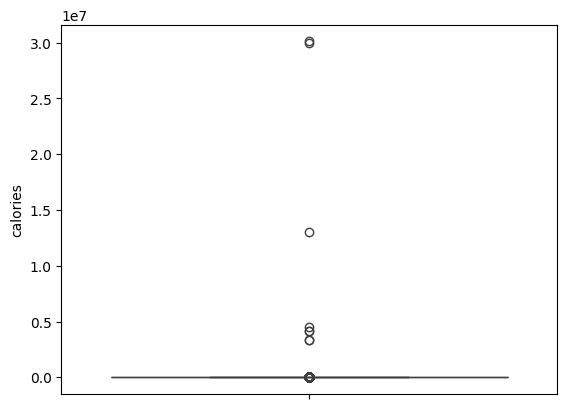

In [ ]:
# Visualize outliers in a sample feature (e.g., 'calories')
sns.boxplot(data['calories'])
plt.show()

# Cap extreme values
q1 = data['calories'].quantile(0.25)
q3 = data['calories'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['calories'] = np.where(data['calories'] > upper_bound, upper_bound, data['calories'])


In [ ]:
# Scale numerical features only
# Select numerical features
numeric_features = data.select_dtypes(include=np.number).columns

# Apply scaling to numerical features only
scaler = StandardScaler()
data_scaled = data.copy()  # Create a copy of the original DataFrame
data_scaled[numeric_features] = scaler.fit_transform(data[numeric_features])

Feature Selection


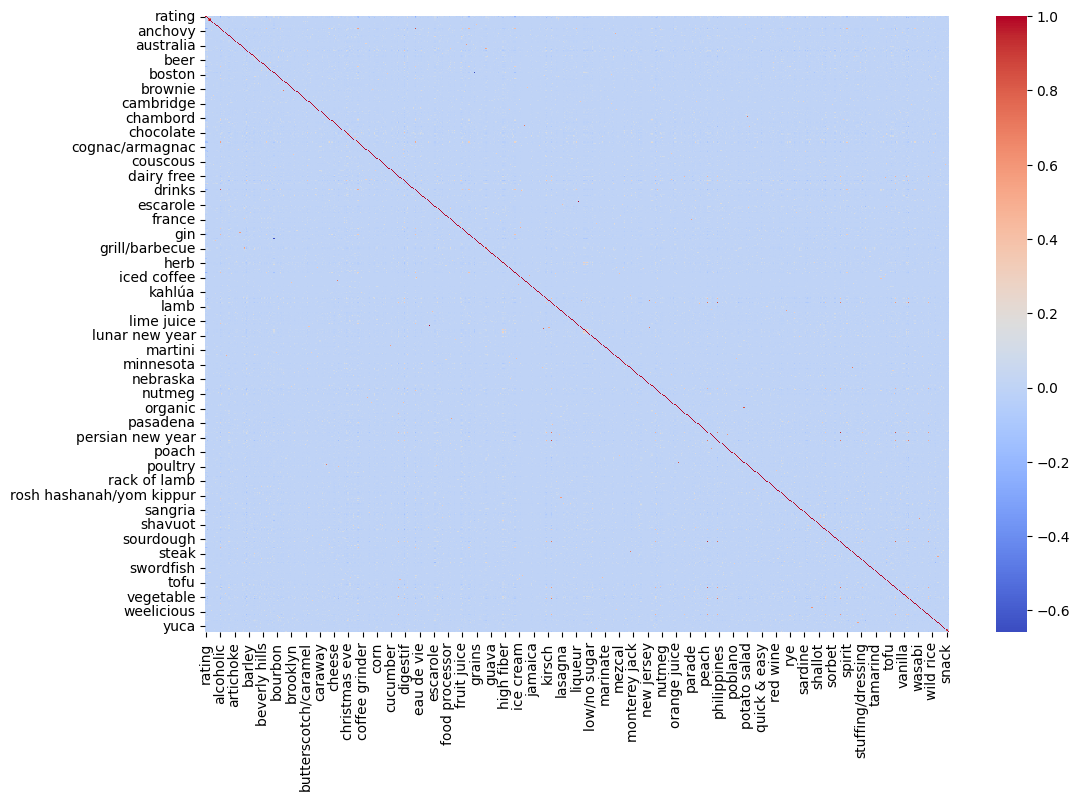

In [ ]:
# Feature selection using correlation
# Select only numerical features for correlation calculation
numerical_data_scaled = data_scaled.select_dtypes(include=np.number)

corr_matrix = numerical_data_scaled.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

Model Building & Evaluation

In [ ]:
# Split the data
# Assuming 'title' and 'rating' are not relevant features
# and all numerical features are selected
X = data_scaled.drop(columns=['title', 'rating', 'calories', 'protein', 'fat', 'sodium']) # Update with relevant features to drop
y = data_scaled['rating']  # Update with your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression -> R²: {r2:.2f}, RMSE: {rmse:.2f}")

Linear Regression -> R²: -5035056246327200112967680.00, RMSE: 2183298735633.08


In [ ]:
# Split the data
# Assuming 'title' and 'rating' are not relevant features
# and all numerical features are selected
X = data_scaled.drop(columns=['title', 'rating', 'calories', 'protein', 'fat', 'sodium']) # Update with relevant features to drop
y = data_scaled['rating']  # Update with your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X_selected should be the features used for training
X_selected = X_train  # Or X if you want to use all data for feature selection

# Train Linear Regression model
# Initialize lr if not already done
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression -> R²: {r2:.2f}, RMSE: {rmse:.2f}")

# Cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')  # Use X and y, both with 20052 samples
print(f"5-Fold CV R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.2f}")

Linear Regression -> R²: -5035056246327200112967680.00, RMSE: 2183298735633.08
5-Fold CV R² Scores: [-7.93611378e+25 -5.50109216e+25 -4.18882901e+25 -2.24895720e+25
 -6.98702678e+24]
Mean CV R² Score: -41147389663278933565505536.00


In [ ]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
print(f"Best Ridge Alpha: {ridge_cv.best_params_}")

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")


Best Ridge Alpha: {'alpha': 100}
Best Lasso Alpha: {'alpha': 0.1}


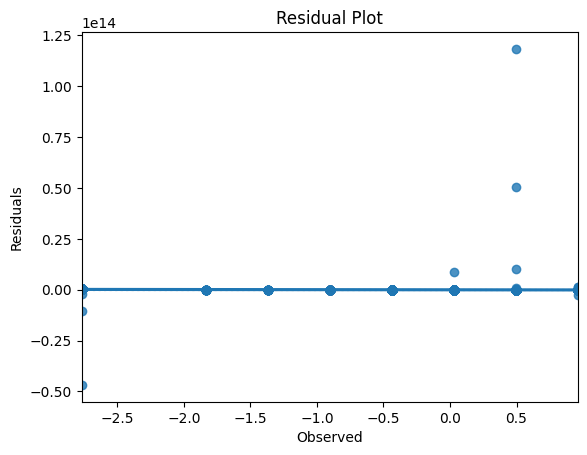

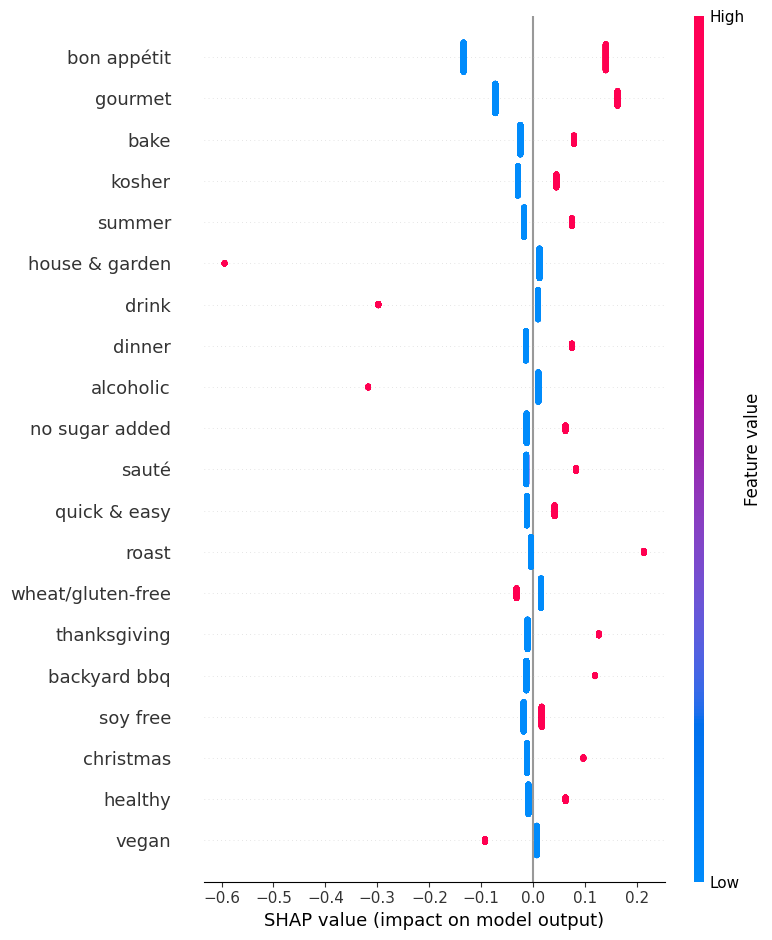

In [ ]:
# Residual Plot
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel("Observed")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# SHAP Visualization
explainer = shap.Explainer(ridge_cv.best_estimator_, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
